In [1]:
import pandas as pd

In [2]:
h_data = pd.read_csv("HC.csv")

In [3]:
h_data.head()

,rownames,depvar,ich.gcc,ich.ecc,ich.erc,ich.hpc,ich.gc,ich.ec,ich.er,icca,och.gcc,och.ecc,och.erc,och.hpc,och.gc,och.ec,och.er,occa,income
0,1,erc,970,786,879,1136,2408,2450,737,2728,226,409,385,173,226,409,385,295,20
1,2,hpc,877,869,709,937,2800,3271,933,2649,230,269,345,165,230,269,345,163,50
2,3,gcc,743,886,694,1170,2571,3168,814,2263,228,525,435,144,228,525,435,218,50
3,4,gcc,918,893,722,1213,2972,2673,804,2533,262,489,485,193,262,489,485,270,50
4,5,gcc,805,702,844,1051,2390,2835,715,2545,252,371,364,163,252,371,364,277,60


In [4]:
h_data.tail()

,rownames,depvar,ich.gcc,ich.ecc,ich.erc,ich.hpc,ich.gc,ich.ec,ich.er,icca,och.gcc,och.ecc,och.erc,och.hpc,och.gc,och.ec,och.er,occa,income
245,246,ecc,718,719,715,779,1829,2496,621,2839,227,282,299,135,227,282,299,203,60
246,247,er,934,1072,791,1224,3323,2898,998,2281,242,444,398,154,242,444,398,252,20
247,248,gcc,720,773,886,1255,2283,2619,946,2638,202,401,417,164,202,401,417,220,70
248,249,gcc,689,773,974,1181,3012,3210,727,2940,206,442,377,125,206,442,377,251,50
249,250,gcc,991,881,669,817,2369,3091,698,2562,288,439,424,163,288,439,424,250,60


In [5]:
h_data.dtypes

rownames     int64
depvar      object
ich.gcc      int64
ich.ecc      int64
ich.erc      int64
ich.hpc      int64
ich.gc       int64
ich.ec       int64
ich.er       int64
icca         int64
och.gcc      int64
och.ecc      int64
och.erc      int64
och.hpc      int64
och.gc       int64
och.ec       int64
och.er       int64
occa         int64
income       int64
dtype: object

In [6]:
replacement_ent = {'ecc':'Cen Elec H&C',
               'gcc':'Cen Gas H&C',
               'erc':'Room Elec H&C',
               'hpc':'Heat Pump H&C',
               'gc':'Cen Gas H',
               'ec':'Cen Elec H',
               'er':'Room Elec H',
               'depvar':'System Type'}


In [21]:
h_data.replace(replacement_ent, inplace= True)

In [22]:
col_names = {'depvar': 'System Type',
            'ich.gcc':'Cen Gas H&C ',
            'ich.ecc':'Cen Elec H&C',
            'ich.erc':'Room Elec H&C',
            'ich.hpc':'Heat Pump H&C',
            'ich.gc':'Cen Gas H only',
            'ich.ec':'Cen Elec H only',
            'ich.er':'Room Elec H only',
            'icca':'Cooling Inst Cost',
            'och.gcc':'Operating Cost ',
            'och.ecc':'OPC Cen Elec H&C',
            'och.erc':'OPC Room Elec H&C ',
            'och.hpc':'OPC Heat Pump H&C',
            'och.gc':'OPC Cen Gas H only',
            'och.ec':'OPC Cen Elec H only',
            'och.er':'OPC Room Elec H only',
            'occa':'Operating Cost of Cooling'}

h_data.rename(columns = col_names, inplace = True)

In [23]:
h_data.head().columns

Index(['rownames', 'System Type', 'Cen Gas H&C ', 'Cen Elec H&C',
       'Room Elec H&C', 'Heat Pump H&C', 'Cen Gas H only', 'Cen Elec H only',
       'Room Elec H only', 'Cooling Inst Cost', 'Operating Cost ',
       'OPC Cen Elec H&C', 'OPC Room Elec H&C ', 'OPC Heat Pump H&C',
       'OPC Cen Gas H only', 'OPC Cen Elec H only', 'OPC Room Elec H only',
       'Operating Cost of Cooling', 'income', 'sys_type_code',
       'Inst_heating_cost'],
      dtype='object')

In [24]:
h_data['sys_type_code'] = pd.factorize(h_data['depvar'])[0]
h_data.tail()

KeyError: 'depvar'

In [12]:
import numpy as np

inst_heating_cost = []
for i, h_datum in h_data.iterrows():
    sys_type = h_datum['depvar']
    inst_heating_cost.append(h_datum[f'ich.{sys_type}'])
h_data['Inst_heating_cost'] = np.array(inst_heating_cost)




In [13]:
h_data.head()

,rownames,depvar,ich.gcc,ich.ecc,ich.erc,ich.hpc,ich.gc,ich.ec,ich.er,icca,...,och.ecc,och.erc,och.hpc,och.gc,och.ec,och.er,occa,income,sys_type_code,Inst_heating_cost
0,1,erc,970,786,879,1136,2408,2450,737,2728,...,409,385,173,226,409,385,295,20,0,879
1,2,hpc,877,869,709,937,2800,3271,933,2649,...,269,345,165,230,269,345,163,50,1,937
2,3,gcc,743,886,694,1170,2571,3168,814,2263,...,525,435,144,228,525,435,218,50,2,743
3,4,gcc,918,893,722,1213,2972,2673,804,2533,...,489,485,193,262,489,485,270,50,2,918
4,5,gcc,805,702,844,1051,2390,2835,715,2545,...,371,364,163,252,371,364,277,60,2,805


In [215]:

#     for instal_cost_col in ['Inst cost HP Cen Gas H&C ',
#        'Inst cost HP Cen Elec H&C', 'Inst cost HP Room Elec H&C',
#        'Inst cost HP Heat Pump H&C', 'Inst cost HP Cen Gas H only',
#        'Inst cost HP Cen Elec H only', 'Inst cost HP Room Elec H only',]:        
#     cost_type_col = f"Inst cost HP {sys_type}"

    

            # one that match
    
len(inst_heating_cost)
    
    
#     inst_cost_per_type= h_data.get(cost_type_col, np.array([]))
#     total_cost = np.sum(inst_cost_per_type)
#     if "Elec" in sys_type:
        
#     print(sys_type, total_cost/ len(inst_cost_per_type), np.median(inst_cost_per_type))


64

In [16]:
x_axis=h_data['depvar']



In [20]:
dtype = h_data.inst_heating_cost

AttributeError: 'DataFrame' object has no attribute 'inst_heating_cost'

In [186]:
h_data['System Type'].groupby()

TypeError: You have to supply one of 'by' and 'level'

In [179]:
h_data.describe()

,rownames,Inst cost HP Cen Gas H&C,Inst cost HP Cen Elec H&C,Inst cost HP Room Elec H&C,Inst cost HP Heat Pump H&C,Inst cost HP Cen Gas H only,Inst cost HP Cen Elec H only,Inst cost HP Room Elec H only,Cooling Inst Cost,Operating Cost,OPC Cen Elec H&C,OPC Room Elec H&C,OPC Heat Pump H&C,OPC Cen Gas H only,OPC Cen Elec H only,OPC Room Elec H only,Operating Cost of Cooling,income,Code
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000
mean,125.500000,782.456000,835.212000,788.876000,1056.708000,2496.480000,2554.796000,776.012000,2535.120000,225.252000,407.864000,413.144000,151.016000,225.252000,407.864000,413.144000,248.944000,44.720000,2.11200
std,72.312977,129.597338,125.529941,116.946924,145.809411,385.645791,376.364594,117.452562,320.214564,34.006799,59.609754,52.119218,22.953238,34.006799,59.609754,52.119218,30.395335,17.149285,0.73595
min,1.000000,439.000000,471.000000,450.000000,674.000000,1353.000000,1664.000000,483.000000,1700.000000,94.000000,233.000000,299.000000,87.000000,94.000000,233.000000,299.000000,163.000000,20.000000,0.00000
25%,63.250000,703.000000,756.000000,709.000000,950.500000,2271.250000,2279.500000,694.250000,2312.000000,206.000000,370.250000,375.250000,137.250000,206.000000,370.250000,375.250000,229.000000,30.000000,2.00000
50%,125.500000,791.000000,840.000000,787.500000,1062.500000,2500.500000,2569.500000,783.000000,2540.500000,225.500000,408.500000,414.000000,152.000000,225.500000,408.500000,414.000000,250.500000,40.000000,2.00000
75%,187.750000,877.000000,915.750000,863.500000,1146.750000,2721.000000,2819.000000,859.750000,2746.750000,246.000000,449.750000,446.750000,166.000000,246.000000,449.750000,446.750000,267.750000,60.000000,2.00000
max,250.000000,1118.000000,1206.000000,1080.000000,1502.000000,3420.000000,3612.000000,1061.000000,3421.000000,318.000000,592.000000,530.000000,212.000000,318.000000,592.000000,530.000000,337.000000,70.000000,6.00000


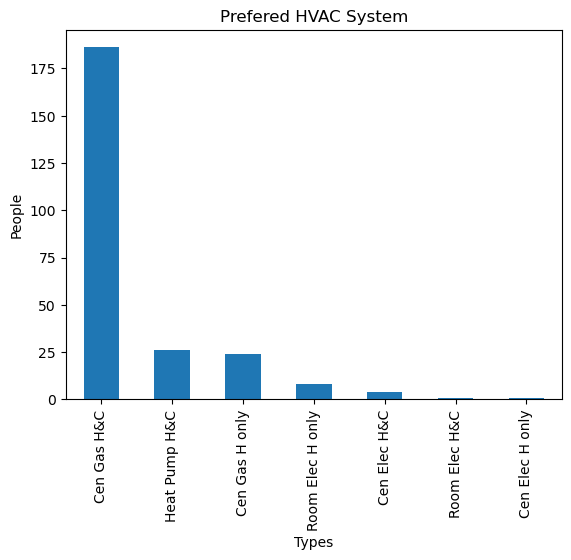

In [155]:
import matplotlib.pyplot as mat

h_data['System Type'].value_counts().plot(kind='bar')
mat.xlabel('Types')
mat.ylabel('People')
mat.title('Prefered HVAC System')
mat.show()